In [1]:
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
df = pd.read_csv('final_data.csv')
df.head(15)

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,1,1,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,1,2,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,1,4,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10,1,8,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,10,1,16,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
5,10,1,32,0.06,0.666667,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
6,10,1,64,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
7,10,1,128,0.04,1.000000,0.001288,0.0

In [3]:
df.tail(20)

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
7020,7936,1984,2,25.70,3.552529,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7021,7936,992,3,12.86,7.099533,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7022,7936,496,4,8.74,10.446224,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7023,7936,248,5,6.58,13.875380,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7024,7936,124,6,0.72,126.805556,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7025,7936,62,7,0.59,154.745763,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7026,7936,31,8,0.84,108.690476,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.00529,0.001323,0.00114,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
7027,7936,16,9,0.63,144.

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,768,12,6,0.18,0.944444,0.002690,0.000897,0.000799,0.000955,0.001613,0.001613,0.001613,0.001613,0.004714,0.001571,0.000009,0.004696,0.004332,0.001083,0.000807,0.001628,0.000019,0.000006,0.000005,0.000008,NVIDIA TITAN V,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
1,100000,15,512,0.08,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.001020,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,5,512,0.11,1.000000,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,NVIDIA GeForce GTX TITAN X,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,1000000,3,4,0.18,1.166667,0.001814,0.604714,0.598175,0.614112,0.000615,0.614751,0.614751,0.614751,0.229760,76.586785,0.217658,229.315172,0.003828,0.957117,0.790004,1.434818,0.000717,0.239110,0.225932,0.264997,NVIDIA GeForce RTX 2080 Ti,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,2816,176,4,0.54,2.166667,0.003572,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001691,0.003207,0.001069,0.000007,0.003191,0.005290,0.001323,0.001140,0.001703,0.000791,0.000264,0.000008,0.000392,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0


In [6]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
       '[CUDA memcpy HtoD] Time cost', '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
       '[CUDA memcpy DtoH] Time cost', '[CUDA memcpy DtoH] Avg cost',
       '[CUDA memcpy DtoH] Min cost', '[CUDA memcpy DtoH] Max cost',
       'cudaMalloc Time cost', 'cudaMalloc Avg cost', 'cudaMalloc Min cost',
       'cudaMalloc Max cost', 'cudaMemcpy Time cost', 'cudaMemcpy Avg cost',
       'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 'cudaFree Time cost',
       'cudaFree Avg cost', 'cudaFree Min cost', 'cudaFree Max cost',
       'Device Name', 'Compute Capability', 'Total Global Memory',
       'Shared Memory per Block', 'Registers per Block', 'Warp Size',
       'Maximum Threads per Block', 'Thread Dimension Z', 'Thread Dimension Y',
       'Thread Dimension X', 'Grid Size Z', 'Grid Size Y', 'Grid Size X',
       'Clock Rate', 'Total Constant Memory', 'Multiprocessor Count',
 

In [7]:
columns = ['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
        '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
        '[CUDA memcpy DtoH] Avg cost','[CUDA memcpy DtoH] Min cost', '[CUDA memcpy DtoH] Max cost',
       'cudaMalloc Avg cost', 'cudaMalloc Min cost', 'cudaMalloc Max cost', 
       'cudaMemcpy Avg cost', 'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 
       'cudaFree Avg cost', 'cudaFree Min cost', 'cudaFree Max cost', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache Size', 'Maximum Threads per Multiprocessor',
       'Concurrent Kernels', 'float', 'unsigned_int', 'int', 'num_blocks',
       'num_grid', 'threads', 'cudaMalloc', 'cudaMemcpy', 'cudaFree', '+',
       'for', '-', '*', '/']

In [8]:
df = df[columns]

In [9]:
y = df['Speedup'].values
df.drop(['Speedup', 'Time'], axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dimensions                          7040 non-null   int64  
 1   Blocks                              7040 non-null   int64  
 2   Threads                             7040 non-null   int64  
 3   [CUDA memcpy HtoD] Avg cost         7040 non-null   float64
 4   [CUDA memcpy HtoD] Min cost         7040 non-null   float64
 5   [CUDA memcpy HtoD] Max cost         7040 non-null   float64
 6   [CUDA memcpy DtoH] Avg cost         7040 non-null   float64
 7   [CUDA memcpy DtoH] Min cost         7040 non-null   float64
 8   [CUDA memcpy DtoH] Max cost         7040 non-null   float64
 9   cudaMalloc Avg cost                 7040 non-null   float64
 10  cudaMalloc Min cost                 7040 non-null   float64
 11  cudaMalloc Max cost                 7040 no

In [11]:
df['Device Name'].unique().tolist()

['NVIDIA TITAN V',
 'NVIDIA GeForce GTX TITAN Black',
 'NVIDIA GeForce GTX TITAN X',
 'NVIDIA GeForce RTX 2080 Ti',
 'NVIDIA GeForce GTX TITAN Z']

In [12]:
oe = OrdinalEncoder()
gpus = oe.fit_transform(df['Device Name'].values.reshape(-1, 1))

In [13]:
df['Device Name'] = gpus

In [14]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,768,12,6,0.000897,0.000799,0.000955,0.001613,0.001613,0.001613,0.001571,0.000009,0.004696,0.001083,0.000807,0.001628,0.000006,0.000005,0.000008,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
1,100000,15,512,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.059715,0.000112,0.178915,0.001020,0.000525,0.002445,0.000313,0.000156,0.000394,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,5,512,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.086266,0.000202,0.258384,0.001753,0.001247,0.003230,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,1000000,3,4,0.604714,0.598175,0.614112,0.614751,0.614751,0.614751,76.586785,0.217658,229.315172,0.957117,0.790004,1.434818,0.239110,0.225932,0.264997,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,2816,176,4,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001069,0.000007,0.003191,0.001323,0.001140,0.001703,0.000264,0.000008,0.000392,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0


In [15]:
with open('utils/gpu_encoder.pickle', 'wb') as ge:
    pickle.dump(oe, ge)

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

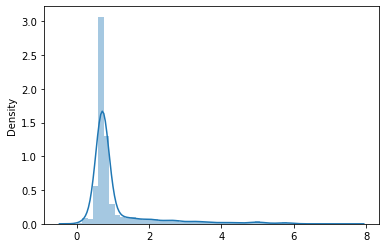

In [16]:
sns.distplot(np.log1p(y))

In [17]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,768,12,6,0.000897,0.000799,0.000955,0.001613,0.001613,0.001613,0.001571,0.000009,0.004696,0.001083,0.000807,0.001628,0.000006,0.000005,0.000008,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
1,100000,15,512,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.059715,0.000112,0.178915,0.001020,0.000525,0.002445,0.000313,0.000156,0.000394,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,5,512,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.086266,0.000202,0.258384,0.001753,0.001247,0.003230,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,1000000,3,4,0.604714,0.598175,0.614112,0.614751,0.614751,0.614751,76.586785,0.217658,229.315172,0.957117,0.790004,1.434818,0.239110,0.225932,0.264997,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,2816,176,4,0.001191,0.001134,0.001221,0.001691,0.001691,0.001691,0.001069,0.000007,0.003191,0.001323,0.001140,0.001703,0.000264,0.000008,0.000392,2.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0


In [18]:
X = df.values

In [19]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', '[CUDA memcpy HtoD] Avg cost',
       '[CUDA memcpy HtoD] Min cost', '[CUDA memcpy HtoD] Max cost',
       '[CUDA memcpy DtoH] Avg cost', '[CUDA memcpy DtoH] Min cost',
       '[CUDA memcpy DtoH] Max cost', 'cudaMalloc Avg cost',
       'cudaMalloc Min cost', 'cudaMalloc Max cost', 'cudaMemcpy Avg cost',
       'cudaMemcpy Min cost', 'cudaMemcpy Max cost', 'cudaFree Avg cost',
       'cudaFree Min cost', 'cudaFree Max cost', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache Size', 'Maximum Threads per Multiprocessor',
       'Concurr

In [20]:
#sc = RobustScaler()
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.1, random_state = 42)

In [22]:
def evaluate_model(model, X_train, y_train, X_val, y_val, metric='R2'):
    model.fit(X_train, y_train)
    if metric == 'RMSE':
        y_pred_train = model.predict(X_train)
        print('Training RMSE score = {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
        y_pred = model.predict(X_val)
        print('Validation RMSE score = {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))
    else:
        print('Training R2 score = {}'.format(model.score(X_train, y_train)))
        print('Validation R2 score = {}'.format(model.score(X_val, y_val)))

In [23]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 35.09081004459871
Validation RMSE score = 28.19608900160344
Training R2 score = 0.21897866004194422
Validation R2 score = 0.28616073991818314


In [24]:
lasso = Lasso()
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 37.57966247048763
Validation RMSE score = 30.603319567066595
Training R2 score = 0.10426021721520196
Validation R2 score = 0.15907016883110525


In [25]:
ridge = Ridge()
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 36.51375364876211
Validation RMSE score = 29.159344705247356
Training R2 score = 0.15435307261921682
Validation R2 score = 0.2365542107542251


In [26]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(svr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 39.13553762425888
Validation RMSE score = 32.73435427692362
Training R2 score = 0.028553872035165573
Validation R2 score = 0.0378777880584491


In [27]:
lsvr = LinearSVR()
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 39.416509127298205
Validation RMSE score = 33.07927724954124
Training R2 score = 0.014574450852162135
Validation R2 score = 0.017528035452262114


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [28]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 0.4402435606603302
Validation RMSE score = 26.769323556305114
Training R2 score = 0.9998770687952886
Validation R2 score = 0.3565756710699005


In [29]:
mlp = MLPRegressor(hidden_layer_sizes=(320,5))
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'R2')

/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Training RMSE score = 30.67803531480965
Validation RMSE score = 22.822331035006712
Training R2 score = 0.015216679511752984
Validation R2 score = 0.018607289788482917


/opt/homebrew/Caskroom/miniforge/base/envs/ml_env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [36]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'R2')

Training RMSE score = 9.132565601872866
Validation RMSE score = 10.655180460182319
Training R2 score = 0.9434811523451239
Validation R2 score = 0.9414635799916931


In [31]:
with open('random_forest_model.pickle', 'wb') as f:
    pickle.dump(rfr, f)

In [32]:
with open('utils/min_max_scaler.pickle', 'wb') as f:
    pickle.dump(sc, f)

In [33]:
y_pred = rfr.predict(X_val)

In [34]:
y_pred[10]

0.9544736919536462

In [35]:
y_val[10]

0.7999999999999999

In [ ]:
# rfe = RFE(rfr)
# rfe = rfe.fit(X_train, y_train)
# columns = [df.columns.tolist()[i] for i in range(len(df.columns.tolist())) if rfe.support_[i]]